# PyVista Basics: 3D Visualization Fundamentals

Learn PyVista fundamentals using simple mathematical functions. This tutorial covers meshes, edge control, and visualization options.

## Prerequisites

```bash
pip install "pyvista[all,trame]"
```

**Important**: We use the `trame` backend for interactive 3D widgets in Jupyter.

In [1]:
import numpy as np
import pyvista as pv
import matplotlib.pyplot as plt

# Configure PyVista for Jupyter notebooks
pv.set_jupyter_backend('trame')
pv.global_theme.window_size = [800, 600]

print(f"PyVista version: {pv.__version__}")

PyVista version: 0.45.2


## 1. Understanding Meshes

A mesh consists of:
- **Points**: 3D coordinates (x, y, z)
- **Cells**: Connections between points (triangles, quads)
- **Data**: Values associated with points or cells

In [ ]:
# Simple triangle example
points = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [0.5, 1, 0]
])

# Define triangle: [3 vertices, vertex0, vertex1, vertex2]
faces = np.array([3, 0, 1, 2])
triangle = pv.PolyData(points, faces)

# Visualize
plotter = pv.Plotter()
plotter.add_mesh(triangle, color='lightblue', edge_color='black', 
                 show_edges=True, line_width=3)
plotter.add_points(points, color='red', point_size=20)
plotter.add_text("Simple Triangle", font_size=16)
plotter.camera_position = 'xy'
plotter.show()

Widget(value='<iframe src="http://localhost:42417/index.html?ui=P_0x7f4bc4ae6960_0&reconnect=auto" class="pyvi…

Exception raised
KeyError('f47b350ae6f1361102b222a11c72ccac_7500d')
Traceback (most recent call last):
  File "/home/igork/projects/complexplorer/.venv/lib/python3.12/site-packages/wslink/protocol.py", line 324, in onCompleteMessage
    results = func(*args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^
  File "/home/igork/projects/complexplorer/.venv/lib/python3.12/site-packages/trame_vtk/modules/vtk/protocols/local_rendering.py", line 33, in get_array
    self.context.get_cached_data_array(data_hash, binary)
  File "/home/igork/projects/complexplorer/.venv/lib/python3.12/site-packages/trame_vtk/modules/vtk/serializers/synchronization_context.py", line 35, in get_cached_data_array
    cache_obj = self.data_array_cache[p_md5]
                ~~~~~~~~~~~~~~~~~~~~~^^^^^^^
KeyError: 'f47b350ae6f1361102b222a11c72ccac_7500d'

Exception raised
KeyError('27e571b8b46bb8b8a420fb60f0814cba_12005L')
Traceback (most recent call last):
  File "/home/igork/projects/complexplorer/.venv/lib/python3.12

## 2. Creating Surface Plots

In [3]:
# Create a mathematical surface
x = np.linspace(-3, 3, 50)
y = np.linspace(-3, 3, 50)
X, Y = np.meshgrid(x, y)

# Ripple function
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Create structured grid
grid = pv.StructuredGrid(X, Y, Z)
grid["values"] = Z.ravel()  # Add scalar data

# Visualize
plotter = pv.Plotter()
plotter.add_mesh(grid, scalars="values", cmap='viridis')
plotter.add_text("Ripple Surface", font_size=16)
plotter.show_axes()
plotter.show()

Widget(value='<iframe src="http://localhost:42417/index.html?ui=P_0x7f4c30118ec0_1&reconnect=auto" class="pyvi…

## 3. Controlling Edges

PyVista provides fine control over edge display:

In [4]:
# Gaussian surface
x = np.linspace(-2, 2, 30)
y = np.linspace(-2, 2, 30)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(X**2 + Y**2))

grid = pv.StructuredGrid(X, Y, Z)
grid["height"] = Z.ravel()

# Compare edge display options
plotter = pv.Plotter(shape=(2, 2))

# No edges
plotter.subplot(0, 0)
plotter.add_mesh(grid, scalars="height", cmap='plasma', show_edges=False)
plotter.add_text("No Edges", font_size=14)

# With edges
plotter.subplot(0, 1)
plotter.add_mesh(grid, scalars="height", cmap='plasma', 
                 show_edges=True, edge_color='black')
plotter.add_text("With Edges", font_size=14)

# Wireframe
plotter.subplot(1, 0)
plotter.add_mesh(grid, style='wireframe', color='darkblue', line_width=2)
plotter.add_text("Wireframe", font_size=14)

# Surface + wireframe
plotter.subplot(1, 1)
plotter.add_mesh(grid, scalars="height", cmap='plasma', opacity=0.8)
plotter.add_mesh(grid.copy(), style='wireframe', color='black', 
                 line_width=1, opacity=0.5)
plotter.add_text("Combined", font_size=14)

plotter.link_views()
plotter.show()

Widget(value='<iframe src="http://localhost:42417/index.html?ui=P_0x7f4ba7695f40_2&reconnect=auto" class="pyvi…

## 4. Interactive Edge Toggle

In [5]:
# Wave surface
x = np.linspace(-3, 3, 60)
y = np.linspace(-3, 3, 60)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y) * np.exp(-0.1 * (X**2 + Y**2))

grid = pv.StructuredGrid(X, Y, Z)
grid["amplitude"] = Z.ravel()

# Interactive plotter
plotter = pv.Plotter()
actor = plotter.add_mesh(grid, scalars="amplitude", cmap='coolwarm', 
                        show_edges=True, edge_color='gray')

plotter.add_text("Press 'e' to toggle edges\nPress 'w' for wireframe", 
                position='upper_left', font_size=14)

# Callbacks
def toggle_edges():
    actor.prop.show_edges = not actor.prop.show_edges

def toggle_wireframe():
    if actor.prop.style == 'surface':
        actor.prop.style = 'wireframe'
    else:
        actor.prop.style = 'surface'

plotter.add_key_event('e', toggle_edges)
plotter.add_key_event('w', toggle_wireframe)

plotter.show_axes()
plotter.show()

Widget(value='<iframe src="http://localhost:42417/index.html?ui=P_0x7f4ba7695d90_3&reconnect=auto" class="pyvi…

## 5. Static vs Interactive Visualization

In [6]:
# Create a torus for demonstration
def create_torus():
    u = np.linspace(0, 2*np.pi, 100)
    v = np.linspace(0, 2*np.pi, 100)
    U, V = np.meshgrid(u, v)
    
    R, r = 3, 1  # Major and minor radius
    X = (R + r*np.cos(V)) * np.cos(U)
    Y = (R + r*np.cos(V)) * np.sin(U)
    Z = r * np.sin(V)
    
    return pv.StructuredGrid(X, Y, Z)

# Interactive visualization
torus = create_torus()
plotter = pv.Plotter()
plotter.add_mesh(torus, color='gold', smooth_shading=True)
plotter.add_text("Interactive Torus (drag to rotate)", font_size=14)
plotter.show()

Widget(value='<iframe src="http://localhost:42417/index.html?ui=P_0x7f4ba7697740_4&reconnect=auto" class="pyvi…

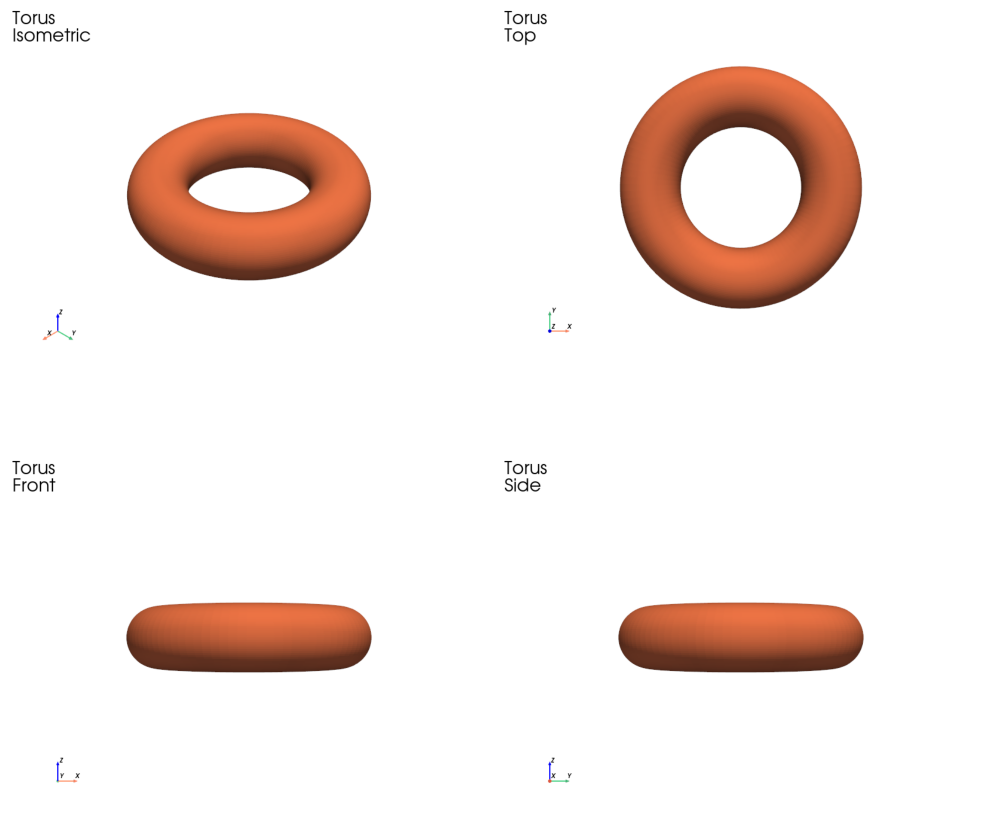

In [7]:
# Static images from different viewpoints
def create_static_views(mesh, title):
    views = [('iso', 'Isometric'), ('xy', 'Top'), 
             ('xz', 'Front'), ('yz', 'Side')]
    images = []
    
    for cam_pos, view_name in views:
        plotter = pv.Plotter(off_screen=True)
        plotter.add_mesh(mesh, color='coral')
        plotter.add_text(f"{title}\n{view_name}", font_size=12)
        plotter.camera_position = cam_pos
        plotter.show_axes()
        img = plotter.screenshot(return_img=True)
        plotter.close()
        images.append(img)
    
    return images

# Display static views
images = create_static_views(create_torus(), "Torus")

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for ax, img in zip(axes.flat, images):
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()
plt.show()

## 6. Advanced Visualization

In [8]:
# Peaks function with contours
def peaks(x, y):
    return (3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) 
            - 10*(x/5 - x**3 - y**5) * np.exp(-x**2 - y**2) 
            - 1/3 * np.exp(-(x+1)**2 - y**2))

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = peaks(X, Y)

grid = pv.StructuredGrid(X, Y, Z)
grid["elevation"] = Z.ravel()

# Create visualization
plotter = pv.Plotter()
plotter.set_background('white', top='lightblue')

# Main surface
plotter.add_mesh(grid, scalars="elevation", cmap='RdBu_r',
                 smooth_shading=True, clim=[-6, 8])

# Contour lines
contours = grid.contour(isosurfaces=10, scalars="elevation")
plotter.add_mesh(contours, color='black', line_width=2)

plotter.add_text("Peaks Function with Contours", font_size=16)
plotter.show()

Widget(value='<iframe src="http://localhost:42417/index.html?ui=P_0x7f4b548f03b0_5&reconnect=auto" class="pyvi…

## 7. Export Options

In [9]:
# Create sample surface
x = np.linspace(-1, 1, 50)
y = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(x, y)
Z = np.cos(3*np.pi*X) * np.cos(3*np.pi*Y) * 0.3

grid = pv.StructuredGrid(X, Y, Z)

print("Export formats:")
print("\nImages:")
print("  • PNG: plotter.screenshot('surface.png')")
print("  • PDF: plotter.save_graphic('surface.pdf')")
print("\n3D Files:")
print("  • STL: grid.save('surface.stl')  # 3D printing")
print("  • VTK: grid.save('surface.vtk')  # ParaView")
print("  • PLY: grid.save('surface.ply')  # With colors")

# Example visualization
plotter = pv.Plotter()
plotter.add_mesh(grid, cmap='viridis', show_edges=True)
plotter.add_text("Ready for Export", font_size=14)
plotter.show()

Export formats:

Images:
  • PNG: plotter.screenshot('surface.png')
  • PDF: plotter.save_graphic('surface.pdf')

3D Files:
  • STL: grid.save('surface.stl')  # 3D printing
  • VTK: grid.save('surface.vtk')  # ParaView
  • PLY: grid.save('surface.ply')  # With colors


Widget(value='<iframe src="http://localhost:42417/index.html?ui=P_0x7f4b54964d10_6&reconnect=auto" class="pyvi…

## Summary

### Key Concepts
- **Meshes**: Points + connectivity = 3D objects
- **Structured grids**: Ideal for f(x,y) functions
- **Edge control**: `show_edges`, `style='wireframe'`
- **Interactivity**: Keyboard shortcuts and mouse control

### Next Steps
- Explore [PyVista examples](https://docs.pyvista.org/examples/)
- Try [complex function visualization](pyvista_tutorial.ipynb)
- Learn about [filters and algorithms](https://docs.pyvista.org/api/core/filters.html)